<a href="https://colab.research.google.com/github/Zainab-Ayoub/machineLearning/blob/main/bikesRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import copy
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
dataset_cols = ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional']

In [3]:
df = pd.read_csv('SeoulBikeData.csv', encoding='latin1').drop(['Date', 'Holiday', 'Seasons'], axis = 1)

In [4]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [5]:
df.columns = dataset_cols
df['functional'] = (df['functional'] == 'Yes').astype(int)
df = df[df['hour'] == 12]
df = df.drop(['hour'], axis=1)

In [6]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


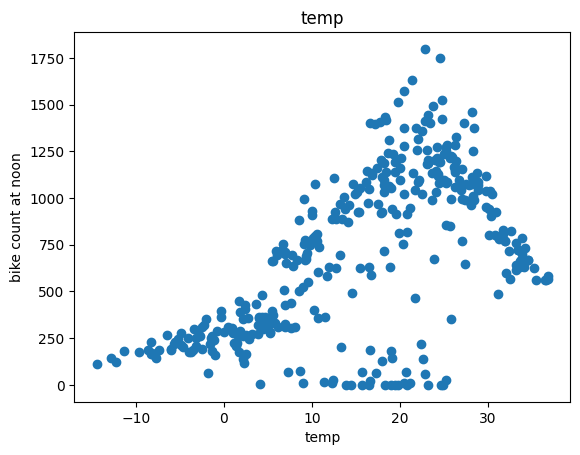

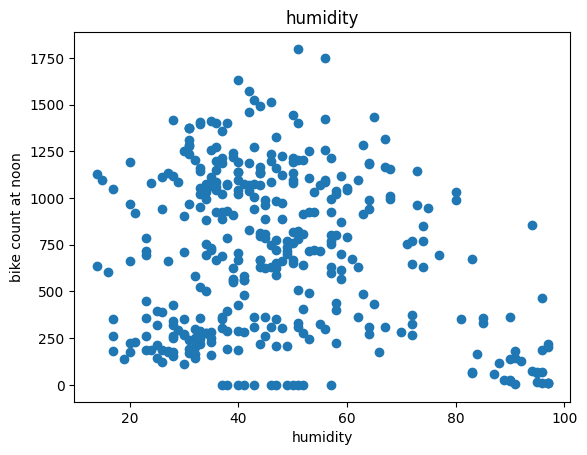

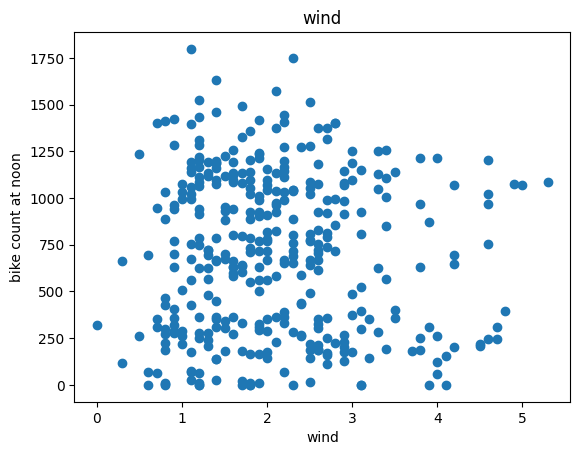

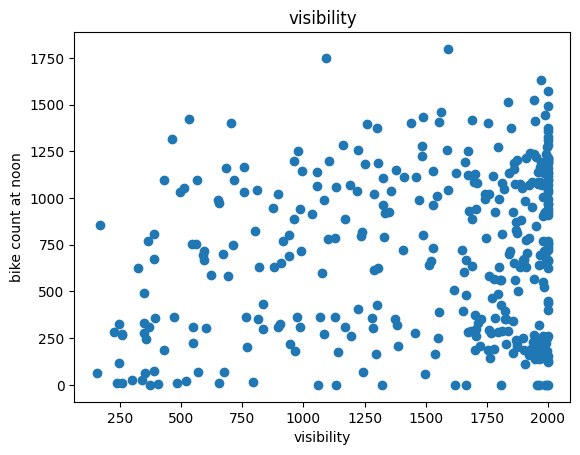

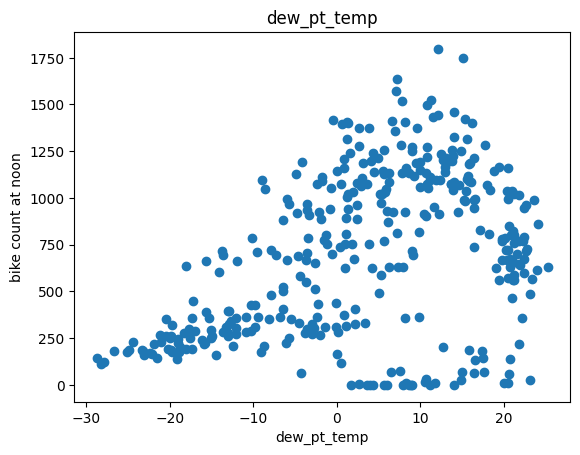

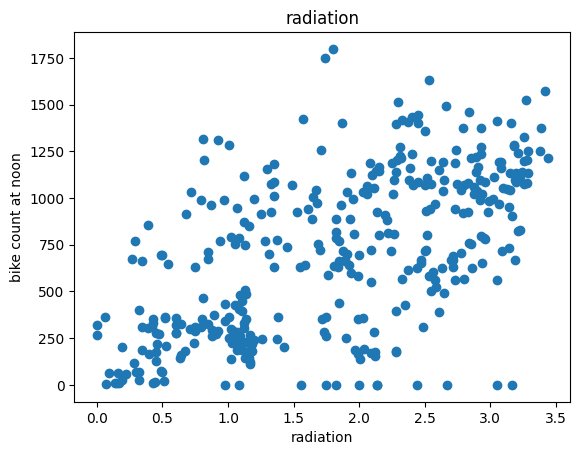

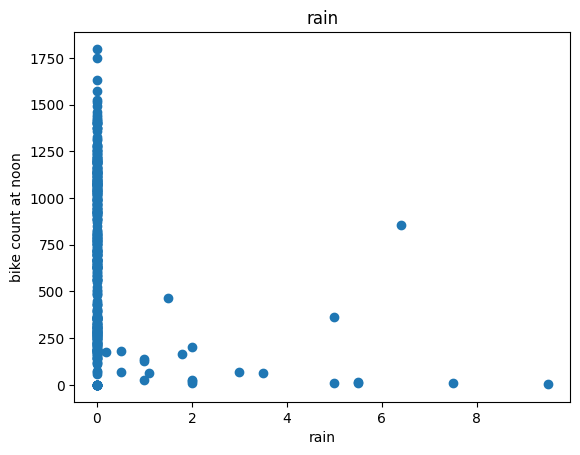

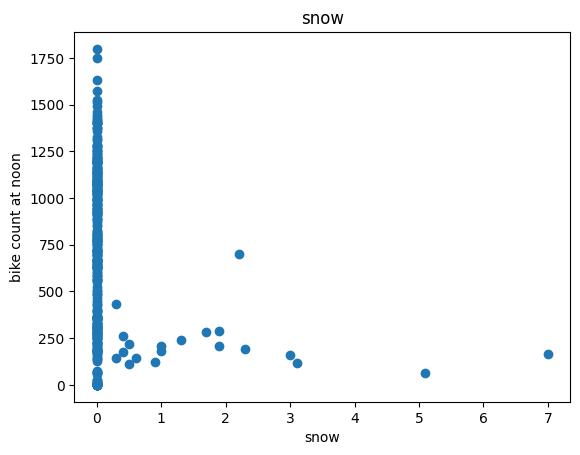

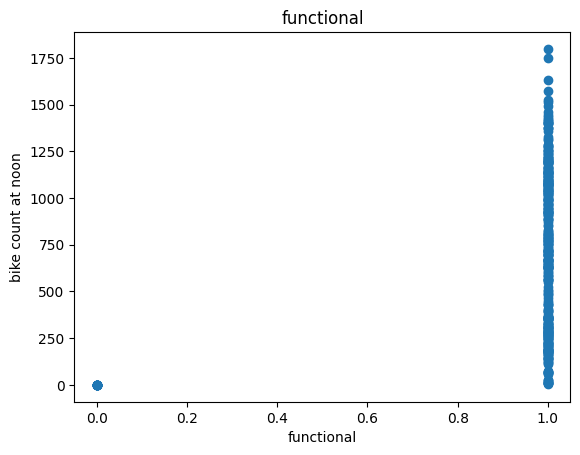

In [7]:
for label in df.columns[1:]:
  plt.scatter(df[label], df['bike_count'])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('bike count at noon')
  plt.show()

In [8]:
df = df.drop(['wind', 'visibility', 'functional'], axis = 1)

In [9]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


**train/valid/test dataset**

In [10]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [12]:
_, X_train_temp, y_train_temp = get_xy(train, 'bike_count', x_labels=['temp'])
_, X_val_temp, y_val_temp = get_xy(val, 'bike_count', x_labels=['temp'])
_, X_test_temp, y_test_temp = get_xy(test, 'bike_count', x_labels=['temp'])

In [13]:
X_train_temp

array([[ 20.8],
       [ 18. ],
       [ 14.9],
       [ 16.5],
       [ -0.3],
       [  7.9],
       [ 16.8],
       [ 25.7],
       [ 10.1],
       [ 19. ],
       [  4. ],
       [ 11.4],
       [  6.9],
       [ 25.8],
       [ 25.2],
       [  5.5],
       [ 31.7],
       [  2.2],
       [ 36.8],
       [ 23.1],
       [ -5.6],
       [  0.9],
       [ 28.2],
       [ 34.5],
       [ 16.2],
       [ 19.2],
       [ 15.7],
       [  7.7],
       [  3.9],
       [ 26.2],
       [ 16.8],
       [  9.8],
       [  2.7],
       [  2.5],
       [ 13.3],
       [ -2.5],
       [ 22.9],
       [  4.8],
       [ 34.1],
       [ 19.4],
       [ 33.6],
       [ 27. ],
       [ 21.5],
       [ 20.1],
       [ 19. ],
       [ -2.5],
       [ 25.2],
       [ -7.3],
       [ -1.1],
       [  6.6],
       [ 10.4],
       [ 23.2],
       [ 28.2],
       [ 24.4],
       [ -3.5],
       [ 21.2],
       [  8.1],
       [ 34.2],
       [ -1.8],
       [ 11.7],
       [ 13.4],
       [ -2.7],
       [

In [14]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [15]:
print(temp_reg.coef_, temp_reg.intercept_)

[[21.643416]] [371.67557259]


In [16]:
temp_reg.score(X_test_temp, y_test_temp)

0.3055078196938479

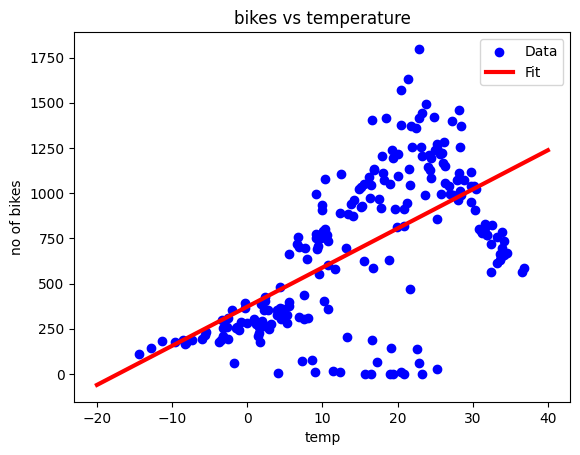

In [17]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('bikes vs temperature')
plt.ylabel('no of bikes')
plt.xlabel('temp')
plt.show()

**multiple linear regression**

In [18]:
_, X_train_all, y_train_all = get_xy(train, 'bike_count', x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, 'bike_count', x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, 'bike_count', x_labels=df.columns[1:])

In [19]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [20]:
all_reg.score(X_test_all, y_test_all)

0.4215925366138348

**regression with neural net**

In [21]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)

  plt.show()

In [22]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [24]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [25]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

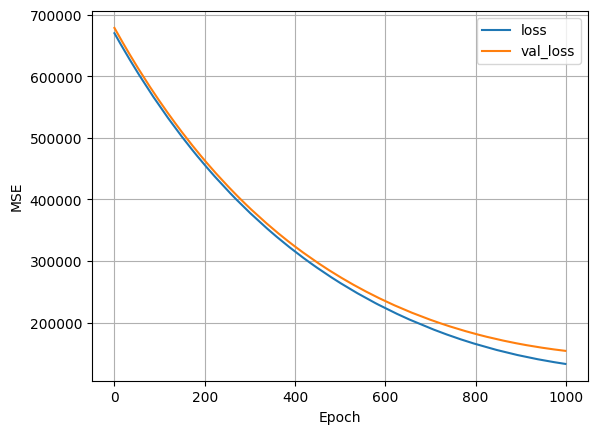

In [26]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


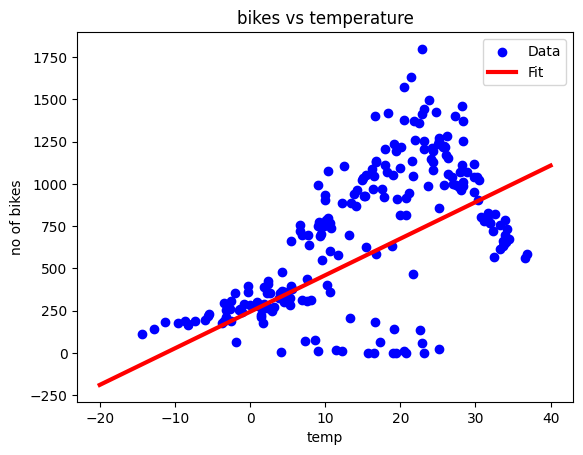

In [27]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('bikes vs temperature')
plt.ylabel('no of bikes')
plt.xlabel('temp')
plt.show()

**neural net**

In [28]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [29]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data = (X_val_temp, y_val_temp),
    verbose=0,
    epochs=100
)

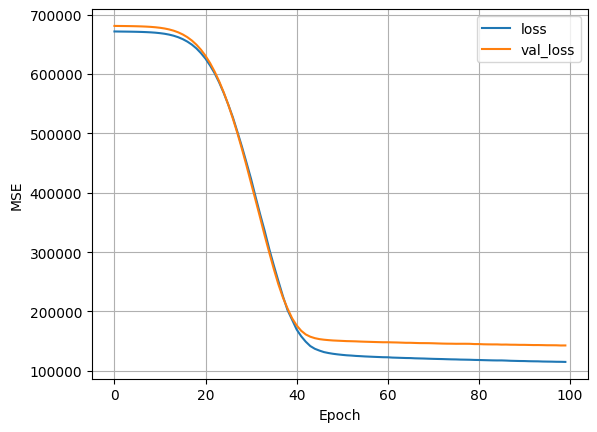

In [30]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


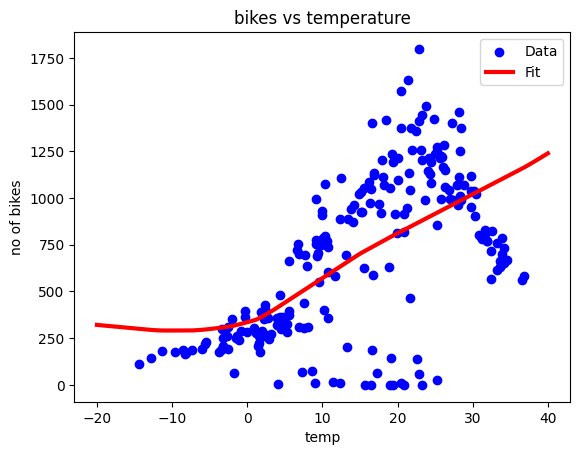

In [31]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('bikes vs temperature')
plt.ylabel('no of bikes')
plt.xlabel('temp')
plt.show()

In [32]:
print("X_train_all.shape:", X_train_all.shape)
print("X_val_all.shape:  ", X_val_all.shape)


X_train_all.shape: (219, 6)
X_val_all.shape:   (73, 6)


In [33]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

In [34]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [35]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data = (X_val_all, y_val_all),
    verbose=0,
    epochs=100
)

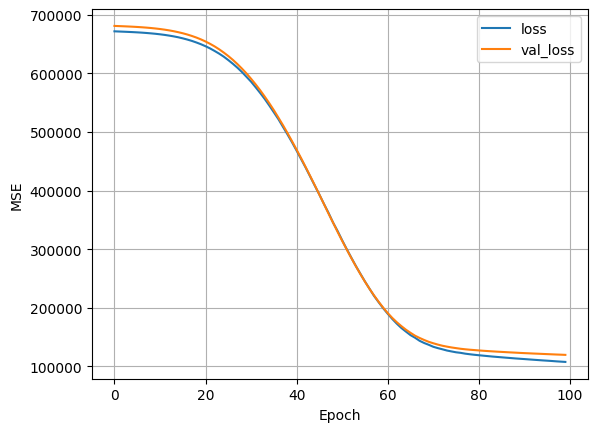

In [36]:
plot_loss(history)

In [37]:
# calculate mse for both linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [38]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [39]:
MSE(y_pred_lr, y_test_all)

np.float64(106403.68196998759)

In [40]:
MSE(y_pred_nn, y_test_all)

np.float64(132243.94427362084)

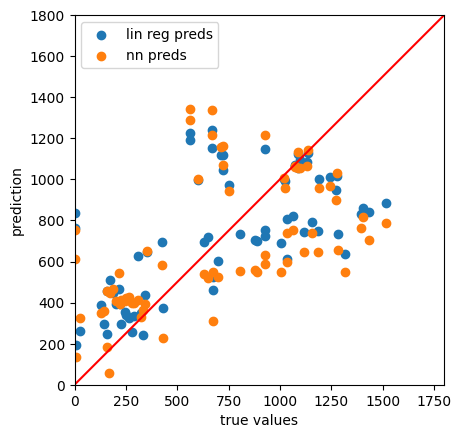

In [44]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all, y_pred_lr, label='lin reg preds')
plt.scatter(y_test_all, y_pred_nn, label='nn preds')
plt.xlabel('true values')
plt.ylabel('prediction')
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c='red')